In [1]:
import pandas as pd
import numpy as np
import requests as rq
import tweepy 
import json 



# Gathering data 

In [2]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_pred=pd.read_csv('image-predictions.tsv',sep='\t')
df_tweet=pd.read_json('tweet-json.json',lines=True)

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

#### Acessing data

In [3]:
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
df_tweet.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [6]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:


df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [9]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:

df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:




df_tweet.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [12]:
df_archive.count

<bound method DataFrame.count of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689       

In [13]:
df_pred.count()

tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

In [14]:

df_tweet.count()

contributors                        0
coordinates                         0
created_at                       2354
display_text_range               2354
entities                         2354
extended_entities                2073
favorite_count                   2354
favorited                        2354
full_text                        2354
geo                                 0
id                               2354
id_str                           2354
in_reply_to_screen_name            78
in_reply_to_status_id              78
in_reply_to_status_id_str          78
in_reply_to_user_id                78
in_reply_to_user_id_str            78
is_quote_status                  2354
lang                             2354
place                               1
possibly_sensitive               2211
possibly_sensitive_appealable    2211
quoted_status                      28
quoted_status_id                   29
quoted_status_id_str               29
retweet_count                    2354
retweeted   

### Quality
##### df_archive
1) drop unused columns
2) drops useless rows 
3) change timestamp to date_time type 
4) change id to string type
5) rating_numebator and rating doimnator to be float type
6) in dog stages columns there is 'none' values 
##### df_pred
1) after tidness of this dataframe there're names in prediction  column in lowercase 
2) change id to string type
##### df_tweet
1) after tidness drop unused columns 
2) change id to string type
3) drop unused rows
### Tidness 
1) merge df_archive and df_tweet 
2) col. names in df_pred
3) id column name in df_tweet should be repalced by tweet_id
4) 4 dog_stages to be in one column 

# Clean

In [15]:
#make copy for each dataframe 
df_clean1= df_archive.copy() 
df_clean2= df_pred.copy()
df_clean3= df_tweet.copy()

###### define
drop unused columns in  df_1 using drop()


##### code

In [16]:
df_clean1.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','source'],axis=1,inplace=True)

##### test

In [17]:
df_clean1

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### define
drop  unused rows 


##### code

In [18]:
cond= df_clean1['tweet_id'].isin(df_clean2['tweet_id'])
df_clean1.drop(df_clean1[~cond].index,inplace=True) 

In [19]:
df_clean1.reset_index(drop=True)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None





##### test

In [20]:
#the count of tweet id in the tweeter archive shoul be equal to e count of tweet id in the image prediction
df_clean1.tweet_id.count()

2075

In [21]:
df_clean2.tweet_id.count()

2075

##### Define
change timestamp to date_time type 

##### code

In [22]:
df_clean1['timestamp']=pd.to_datetime(df_clean1['timestamp'])


##### test

In [23]:
df_clean1.timestamp.dtype


dtype('<M8[ns]')



##### define
tweet_id type to string type 

##### code

In [24]:
df_clean1['tweet_id']=df_clean1.tweet_id.astype(str)

##### test

In [25]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 194.5+ KB




##### define 
rating_numebator and rating doimnator to be float type


##### code

In [26]:
df_clean1['rating_numerator']=df_clean1.rating_numerator.astype(float)
df_clean1['rating_denominator']=df_clean1.rating_denominator.astype(float)

##### test

In [27]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null float64
rating_denominator    2075 non-null float64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 194.5+ KB


##### Define 
 unused columns in df_tweet sould be dropped

##### code

In [28]:
list(df_clean3)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [29]:
df_clean3.drop(['in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','lang','place','retweeted','retweeted_status','contributors', 'coordinates','created_at','display_text_range','entities','extended_entities','favorited','full_text','geo','truncated','user','possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','id_str'],axis=1,inplace=True)

##### test

In [30]:
df_clean3.head(5)

,favorite_count,id,retweet_count,source
0,39467,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,33819,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,25461,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,42908,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,41048,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r..."



##### define
change id to string type

##### code

In [31]:
df_clean3['id']=df_clean3.id.astype(str)

##### test

In [32]:
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
id                2354 non-null object
retweet_count     2354 non-null int64
source            2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


##### define
none values in dog stages columns 

##### code 

In [33]:
df_clean1['doggo']=df_clean1.doggo.str.replace('None','')
df_clean1['pupper']=df_clean1.pupper.str.replace('None','')
df_clean1['puppo']=df_clean1.puppo.str.replace('None','')
df_clean1['floofer']=df_clean1.floofer.str.replace('None','')


##### test

In [34]:
df_clean1.doggo.head(5)

0    
1    
2    
3    
4    
Name: doggo, dtype: object

In [35]:
df_clean1.pupper.head(5)

0    
1    
2    
3    
4    
Name: pupper, dtype: object

In [36]:
df_clean1.puppo.head(5)

0    
1    
2    
3    
4    
Name: puppo, dtype: object

In [37]:

df_clean1.floofer.head(5)

0    
1    
2    
3    
4    
Name: floofer, dtype: object

##### define
the type of tweet_id column is to be string 

##### code

In [38]:
df_clean2['tweet_id']=df_clean2.tweet_id.astype(str)

##### test

In [42]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## tidness

##### define
df_clean2 need to be reshaped

##### code 

In [43]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
df_clean2.columns = cols


In [44]:

# Reshaping the dataframe
df_clean2 =pd.wide_to_long(df_clean2.reset_index(0), stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_")

##### test

In [45]:
df_clean2 

index  \
tweet_id           jpg_url                                         img_num prediction_level          
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1                     0   
                                                                           2                     0   
                                                                           3                     0   
666029285002620928 https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg 1       1                     1   
                                                                           2                     1   
                                                                           3                     1   
666033412701032449 https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg 1       1                     2   
                                                                           2                     2   
                                                                           3                     2   
666044226329800704 https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg 1       1                     3   
                                                                           2                     3   
                                                                           3                     3   
666049248165822465 https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg 1       1                     4   
                                                                           2                     4   
                                                                           3                     4   
666050758794694657 https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg 1       1                     5   
                                                                           2                     5   
                                                                           3                     5   
666051853826850816 https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg 1       1                     6   
                                                                           2                     6   
                                                                           3                     6   
666055525042405380 https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg 1       1                     7   
                                                                           2                     7   
                                                                           3                     7   
666057090499244032 https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg 1       1                     8   
                                                                           2                     8   
                                                                           3                     8   
666058600524156928 https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg 1       1                     9   
                                                                           2                     9   
                                                                           3                     9   
...                                                                                            ...   
890240255349198849 https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg 1       1                  2065   
                                                                           2                  2065   
                                                                           3                  2065   
890609185150312448 https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg 1       1                  2066   
                                                                           2                  2066   
                                                                           3                  2066   
890729181411237888 https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg 2       1                  2067   
             

##### define
id column name should be changed 

##### code

In [46]:
df_clean3=df_clean3.rename(columns={'id':'tweet_id'})

##### test

In [47]:
df_clean3

,favorite_count,tweet_id,retweet_count,source
0,39467,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,33819,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,25461,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,42908,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,41048,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r..."
5,20562,891087950875897856,3261,"<a href=""http://twitter.com/download/iphone"" r..."
6,12041,890971913173991426,2158,"<a href=""http://twitter.com/download/iphone"" r..."
7,56848,890729181411237888,16716,"<a href=""http://twitter.com/download/iphone"" r..."
8,28226,890609185150312448,4429,"<a href=""http://twitter.com/download/iphone"" r..."
9,32467,890240255349198849,7711,"<a href=""http://twitter.com/download/iphone"" r..."


##### define
4dog stages columns to be in one column

##### code

In [48]:
df_clean1['stages_of_dogs'] = df_clean1.floofer + df_clean1.doggo+ df_clean1.pupper + df_clean1.puppo 
df_clean1.drop(['doggo','pupper','puppo','floofer','name'],axis=1,inplace=True)

In [49]:
df_clean1.loc[df_clean1.stages_of_dogs == 'doggopupper', 'stages_of_dogs'] = 'doggo-pupper'
df_clean1.loc[df_clean1.stages_of_dogs == 'doggopuppo', 'stages_of_dogs'] = 'doggo-puppo'
df_clean1.loc[df_clean1.stages_of_dogs == 'doggofloofer', 'stages_of_dogs'] = 'doggo-floofer'


In [50]:
df_clean1['stages_of_dogs']=df_clean1.stages_of_dogs.replace('',np.nan)

##### test

In [51]:
df_clean1.stages_of_dogs.value_counts()

pupper          211
doggo            67
puppo            23
doggo-pupper     11
floofer           7
flooferdoggo      1
doggo-puppo       1
Name: stages_of_dogs, dtype: int64

##### define 
after tidness some columns in df_pred have some lowercase need to be capital 

##### code

In [52]:
df_clean2['prediction']=df_clean2.prediction.str.title()


##### test

In [53]:
df_clean2.head(3)

index  \
tweet_id           jpg_url                                         img_num prediction_level          
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1                     0   
                                                                           2                     0   
                                                                           3                     0   

                                                                                                         prediction  \
tweet_id           jpg_url                                         img_num prediction_level                           
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1                 Welsh_Springer_Spaniel   
                                                                           2                                 Collie   
                                                                           3                      Shetland_Sheepdog   

                                                                                             confidence  \
tweet_id           jpg_url                                         img_num prediction_level               
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1                   0.465074   
                                                                           2                   0.156665   
                                                                           3                   0.061428   

                                                                                             breed  
tweet_id           jpg_url                                         img_num prediction_level         
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1                  True  
                                                                           2                  True  
                                                                           3                  True

##### define
after tidness remove unused rows from df_tweet

##### code

In [54]:
cond1= df_clean3['tweet_id'].isin(df_clean1['tweet_id'])
df_clean3.drop(df_clean3[~cond1].index,inplace=True) 
df_clean3.reset_index(drop=True)

,favorite_count,tweet_id,retweet_count,source
0,39467,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,33819,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,25461,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,42908,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,41048,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r..."
5,20562,891087950875897856,3261,"<a href=""http://twitter.com/download/iphone"" r..."
6,12041,890971913173991426,2158,"<a href=""http://twitter.com/download/iphone"" r..."
7,56848,890729181411237888,16716,"<a href=""http://twitter.com/download/iphone"" r..."
8,28226,890609185150312448,4429,"<a href=""http://twitter.com/download/iphone"" r..."
9,32467,890240255349198849,7711,"<a href=""http://twitter.com/download/iphone"" r..."


##### test

In [57]:
(df_clean3['tweet_id'].shape,df_clean1['tweet_id'].shape)

((2073,), (2075,))

##### define 
merge dataframes 

##### code 

In [58]:
df_mrge = pd.merge(df_clean1, df_clean3, how='left', left_on='tweet_id',right_on='tweet_id')


##### test

In [59]:
df_mrge.head(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,stages_of_dogs,favorite_count,retweet_count,source
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,NaN,39467.0,8853.0,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,NaN,33819.0,6514.0,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,NaN,25461.0,4328.0,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,NaN,42908.0,8964.0,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,NaN,41048.0,9774.0,"<a href=""http://twitter.com/download/iphone"" r..."


##### save cleaning data 

In [60]:
df_mrge=df_mrge.to_csv('twitter_archive_master.csv',index=False)
df_clean2=df_clean2.to_csv('image_predication.csv',index=False)

In [61]:
df_mrge=pd.read_csv('twitter_archive_master.csv')
df_clean2=pd.read_csv('image_predication.csv')
 

In [62]:

df_mrge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null float64
rating_denominator    2075 non-null float64
stages_of_dogs        321 non-null object
favorite_count        2073 non-null float64
retweet_count         2073 non-null float64
source                2073 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 162.2+ KB


In [63]:
df_clean2.info()
df_clean2=df_clean2.fillna(0)
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 4 columns):
index         6225 non-null int64
prediction    6225 non-null object
confidence    6225 non-null float64
breed         6225 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 4 columns):
index         6225 non-null int64
prediction    6225 non-null object
confidence    6225 non-null float64
breed         6225 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 152.1+ KB


In [64]:
df_mrge=df_mrge.fillna(0)
df_mrge.retweet_count=df_mrge.retweet_count.astype(int)
df_mrge.favorite_count=df_mrge.favorite_count.astype(int)

In [65]:
df_mrge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null float64
rating_denominator    2075 non-null float64
stages_of_dogs        2075 non-null object
favorite_count        2075 non-null int64
retweet_count         2075 non-null int64
source                2075 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 162.2+ KB


In [66]:
df_mrge.timestamp=pd.to_datetime(df_mrge.timestamp)

In [67]:
df_mrge.timestamp.dtype

dtype('<M8[ns]')

##### analyze

In [68]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
df_mrge.stages_of_dogs.value_counts()

0               1754
pupper           211
doggo             67
puppo             23
doggo-pupper      11
floofer            7
flooferdoggo       1
doggo-puppo        1
Name: stages_of_dogs, dtype: int64

In [69]:
df_mrge.retweet_count.dtype

dtype('int64')

In [70]:
df_mrge.favorite_count.dtype

dtype('int64')

In [71]:
#most dog breed is this study :
df_clean2.prediction.mode()[0]

'Golden_Retriever'

In [72]:
#average of retweet count
df_mrge.retweet_count.mean()

2973.2207228915663

In [73]:
#average of favorite_count
df_mrge.favorite_count.mean()
cond1= df_mrge['stages_of_dogs'] != 0
df_mrge.drop(df_mrge[~cond1].index,inplace=True) 
df_mrge.reset_index(drop=True)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,stages_of_dogs,favorite_count,retweet_count,source
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,doggo,32467,7711,"<a href=""http://twitter.com/download/iphone"" r..."
1,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,puppo,38818,8538,"<a href=""http://twitter.com/download/iphone"" r..."
2,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,puppo,15359,2321,"<a href=""http://twitter.com/download/iphone"" r..."
3,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,pupper,21524,3316,"<a href=""http://twitter.com/download/iphone"" r..."
4,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,doggo,20771,3128,"<a href=""http://twitter.com/download/iphone"" r..."
5,883360690899218434,2017-07-07 16:22:55,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13.0,10.0,floofer,22986,3825,"<a href=""http://twitter.com/download/iphone"" r..."
6,882762694511734784,2017-07-06 00:46:41,This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12.0,10.0,pupper,28903,5134,"<a href=""http://twitter.com/download/iphone"" r..."
7,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,pupper,50199,16570,"<a href=""http://twitter.com/download/iphone"" r..."
8,878776093423087618,2017-06-25 00:45:22,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13.0,10.0,puppo,19763,4319,"<a href=""http://twitter.com/download/iphone"" r..."
9,877611172832227328,2017-06-21 19:36:23,RT @rachel2195: @dog_rates the boyfriend and h...,https://twitter.com/rachel2195/status/87685077...,14.0,10.0,pupper,0,83,"<a href=""http://twitter.com/download/iphone"" r..."


In [74]:
#most stage of dogs in this study
ordered_stages = df_mrge['stages_of_dogs'].value_counts()
ordered_stages 
#ordered_stages.plot.bar()

pupper          211
doggo            67
puppo            23
doggo-pupper     11
floofer           7
doggo-puppo       1
flooferdoggo      1
Name: stages_of_dogs, dtype: int64

In [75]:
avg_retweet_count_dog_stage = df_mrge.groupby("stages_of_dogs").retweet_count.mean()

In [76]:
avg_favorite_count_dog_stage = df_mrge.groupby("stages_of_dogs").favorite_count.mean()


In [77]:
import seaborn as sns

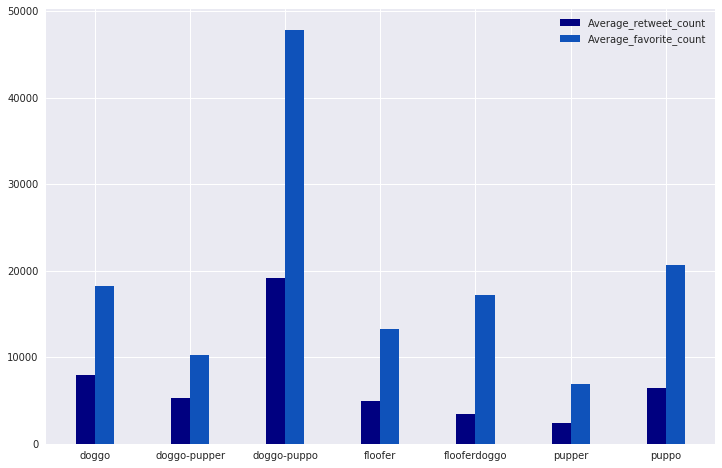

In [85]:
width = 0.2 # width of the bar
ind = np.arange(len(avg_favorite_count_dog_stage)) # x-axis ticks
locations = ind + width / 2  # xtick locations
labels = avg_favorite_count_dog_stage.index  # xtick labels


retweet_count_bars = plt.bar(ind, avg_retweet_count_dog_stage, width,
                             color='#000080', label= 'Average_retweet_count')
favorite_count_bars = plt.bar(ind +width , avg_favorite_count_dog_stage, width, 
                              color='#0F52BA', label= 'Average_favorite_count')
plt.xticks(locations, labels)
plt.legend()

sns.set_context('notebook')
sns.set(rc={'figure.figsize':(10,5)});


In [80]:
avg_retweet_count_timestamp = df_mrge.groupby("timestamp").retweet_count.mean()

In [81]:
avg_favorite_count_timestamp = df_mrge.groupby("timestamp").favorite_count.mean()

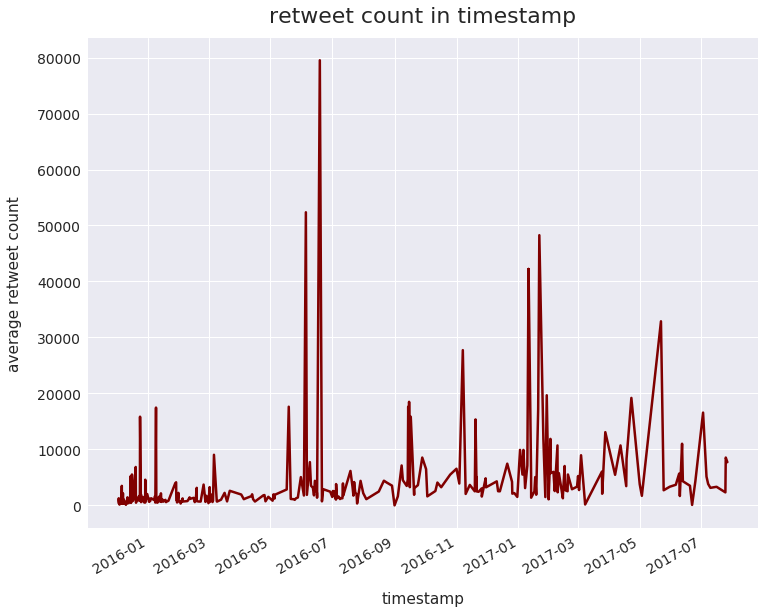

In [82]:
sns.set(font_scale=1.4)
avg_retweet_count_timestamp.plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("timestamp", labelpad=15)
plt.ylabel("average retweet count", labelpad=15)
plt.title("retweet count in timestamp", y=1.02, fontsize=22);

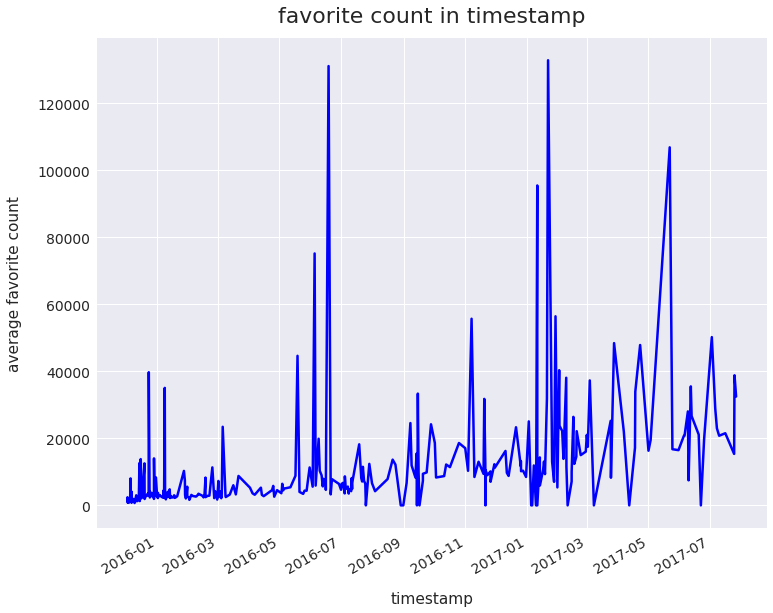

In [83]:
sns.set(font_scale=1.4)
avg_favorite_count_timestamp.plot(figsize=(12, 10), linewidth=2.5, color='blue')
plt.xlabel("timestamp", labelpad=15)
plt.ylabel("average favorite count", labelpad=15)
plt.title("favorite count in timestamp", y=1.02, fontsize=22);